In [1]:
#Name: Mark McAfoose
#Student ID: 801149826
#Homework 2
#Github Link


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score
from numpy import mean
#Alot of this stuff probably isn't needed up here, I just added them as I was figuring out my code and didn't want to delete them in case it messed something up

In [3]:
diabetes = pd.read_csv('diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
print(diabetes.head())
#Splits diabetes dataset into input/output
X = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].values
Y = diabetes.iloc[:,[8]].values
X[0:10]

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01],
       [5.000e+00, 1.160e+02, 7.400e+01, 0.000e+00, 0.000e+00, 2.560e+01,
        2.010e-01, 3.000e+01],
       [3.000e+00, 7.800e+01, 5.000e+01, 3.200e+01, 8.800e+01, 3.100e+01,
        2.480e-01, 2.600e+01],
       [1.000e+01, 1.150e+02, 0.000e+00, 0.000e+00, 0.000e+00, 3.530e+01,
        1.340e-01, 2.900e+01],
       [2.000e+00, 1.970e+02, 7.000e+01, 4.500e+01, 5.430e+02, 3.050e+01,
        1.580e-01, 5.300e+01],
       [8.000e+00, 1.250e+02, 9.600e+01, 0.000e+00, 0.0

In [5]:
#Split the input/output collections into training/validationsets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)
print(X_train)

[[7.00e+00 1.50e+02 7.80e+01 ... 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 ... 5.23e+01 4.27e-01 2.30e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Performs standarization
print(X_train)

[[ 0.90832902  0.91569367  0.44912368 ...  0.37852648  0.67740401
   1.69955804]
 [ 0.03644676 -0.75182191 -0.47230103 ... -0.50667229 -0.07049698
  -0.96569189]
 [-1.12606292  1.38763205  1.06340683 ...  2.54094063 -0.11855487
  -0.88240283]
 ...
 [ 0.03644676 -0.84620959 -0.21634972 ... -0.94927168 -0.95656442
  -1.04898095]
 [ 2.0708387  -1.12937261  0.24436264 ... -0.26640405 -0.50001442
   0.11706589]
 [ 0.32707418  0.47521786  0.65388473 ... -4.07275877  0.52121586
   2.94889395]]


In [7]:
#Problem 1, logistic regression
#Logistic_Class = LogisticRegression(random_state=0)
#Logistic_Class.fit(X_train, Y_train)
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0) 
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


array([1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [8]:
#Print confusion matrix
from sklearn.metrics import confusion_matrix

cn_m=confusion_matrix(Y_test, Y_pred)
print(cn_m)

[[98  9]
 [18 29]]


In [9]:
#Print Accuracy, Precision, and Recall for Problem 1
from sklearn import metrics 
print("Accuracy is:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision is:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall is:",metrics.recall_score(Y_test, Y_pred))

Accuracy is: 0.8246753246753247
Precision is: 0.7631578947368421
Recall is: 0.6170212765957447


Text(0.5, 257.44, 'Da Predicted Value Label')

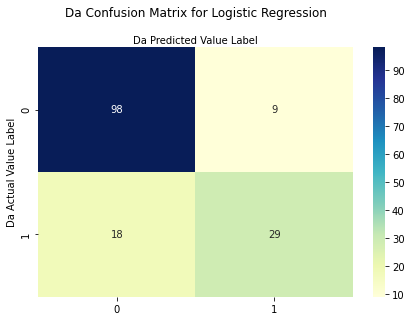

In [10]:
#Confusion Matrix Graph
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cn_m), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Da Confusion Matrix for Logistic Regression', y=1.1) 
plt.ylabel('Da Actual Value Label') 
plt.xlabel('Da Predicted Value Label')

In [11]:
#Problem 2,Naive Bays Binary Classifier for positive diabetes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [12]:
Y_pred  =  classifier.predict(X_test)
#print(Y_pred)

In [13]:
#Confusion Matrix and Validation Scores 
cn_m2 = confusion_matrix(Y_test, Y_pred)
print(cn_m2)

[[93 14]
 [18 29]]


In [14]:
print("Accuracy is:",metrics.accuracy_score(Y_test, Y_pred)) 
print("Precision is:",metrics.precision_score(Y_test, Y_pred)) 
print("Recall is:",metrics.recall_score(Y_test, Y_pred))

Accuracy is: 0.7922077922077922
Precision is: 0.6744186046511628
Recall is: 0.6170212765957447


In [15]:
#Values for Naive Bays are close to Logistic Regression, with lower accuracy and precision, but same recall

Text(0.5, 257.44, 'Da Predicted Value Label')

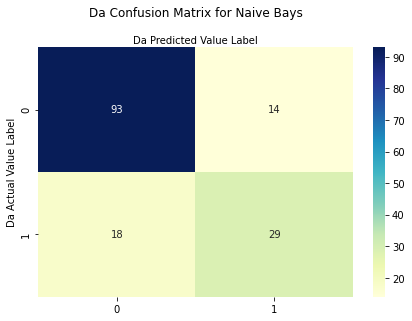

In [16]:
#Output a visual representation of the confusion matirx.
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names) 
# create heatmap 
sns.heatmap(pd.DataFrame(cn_m2), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Da Confusion Matrix for Naive Bays', y=1.1) 
plt.ylabel('Da Actual Value Label') 
plt.xlabel('Da Predicted Value Label')

In [17]:
#K = 5
cv = KFold(n_splits=5, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
print("Accuracy is:",mean(final_scores['test_accuracy'])) 
print("Precision is:",mean(final_scores['test_precision'])) 
print("Recall is:",mean(final_scores['test_recall']))

Accuracy is: 0.7578558696205755
Precision is: 0.6709650864971336
Recall is: 0.6013137121439008


In [18]:
#Compared to Logistic Regression in Problem 1, K-Fold Cross-Validation(K = 5) had lower accuracy, lower precision, and lower recall

In [19]:
#K = 10:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
print("Accuracy is:",mean(final_scores['test_accuracy'])) 
print("Precision is:",mean(final_scores['test_precision'])) 
print("Recall is:",mean(final_scores['test_recall']))

Accuracy is: 0.7564764183185236
Precision is: 0.6652269630530501
Recall is: 0.600860189563338


In [20]:
#Compared to Logistic Regression in Problem 1, K-Fold Cross-Validation(K = 10) had lower accuracy, lower precision, and lower recall

In [21]:
#Problem 4, K-Fold Cross-Validation for Naive Bays Classifier
#K = 5
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
print("Accuracy is:",mean(final_scores['test_accuracy'])) 
print("Precision is:",mean(final_scores['test_precision'])) 
print("Recall is:",mean(final_scores['test_recall']))

Accuracy is: 0.7564764183185236
Precision is: 0.6652269630530501
Recall is: 0.600860189563338


In [ ]:
#Does not say to compare resuts, but just in case, higher accuracy, lower precision, lower recall

In [22]:
#K = 10
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = GaussianNB()
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score)}

final_scores = cross_validate(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1)
print("Accuracy is:",mean(final_scores['test_accuracy'])) 
print("Precision is:",mean(final_scores['test_precision'])) 
print("Recall is:",mean(final_scores['test_recall']))

Accuracy is: 0.7564764183185236
Precision is: 0.6652269630530501
Recall is: 0.600860189563338


In [ ]:
#lower accuracy, Lower precision, lower recall
#It does not make sense to use K-Fold, ad Naive Bayes is a classifier for probablility 